In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

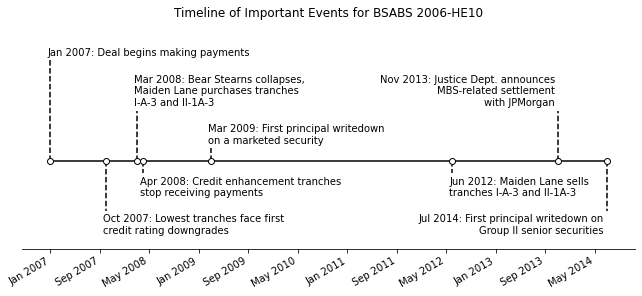

In [56]:
# Base code for timeline comes from https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html

names = ['Jan 2007: Deal begins making payments',
    'Oct 2007: Lowest tranches face first\ncredit rating downgrades',
    'Mar 2008: Bear Stearns collapses,\nMaiden Lane purchases tranches\nI-A-3 and II-1A-3',
    'Apr 2008: Credit enhancement tranches\nstop receiving payments',
    'Mar 2009: First principal writedown\non a marketed security',
    'Jun 2012: Maiden Lane sells\ntranches I-A-3 and II-1A-3',
    'Nov 2013: Justice Dept. announces\nMBS-related settlement\nwith JPMorgan',
    'Jul 2014: First principal writedown on\nGroup II senior securities']

dates = ['2007-01-01',
    '2007-10-01',
    '2008-03-01',
    '2008-04-01',
    '2009-03-01',
    '2012-06-01',
    '2013-11-01',
    '2014-07-01']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
# Choose some nice levels
levels = [4, -2, 2, -0.5, 0.5, -0.5, 2, -2]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Timeline of Important Events for BSABS 2006-HE10")

ax.vlines(dates, 0, levels, ls="--", color="black",)  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates[:-2], levels[:-2], names[:-2]):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="left",
                verticalalignment="bottom" if l > 0 else "top")

# annotate lines
for d, l, r in zip(dates[-2:], levels[-2:], names[-2:]):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.margins(y=0.25)
fig.savefig('../figures/timeline_of_important_events.png',dpi=200,bbox_inches='tight')